# **VeRoLog Solver Challenge 2019**

# **Problem Statment**

### **The VeRoLog Solver Challenge 2019 involves efficiently delivering and installing vending machines to customers within specified time windows, while minimizing costs associated with transportation, technician utilization, and machine idle time penalties.**

Here's a breakdown of the key components and requirements of the problem:

### **-->Machine Requests and Delivery:**

* Customers make requests for specific types and quantities of vending machines.
* Each request has a delivery window, which is a range of consecutive days within which the machines must be delivered.
* Machines are located initially at a central depot.
* Trucks are used to transport machines from the depot to customers.
* Trucks have a capacity limit in terms of the total size (or weight) of machines they can carry in a single trip.
* Each request must be delivered in its entirety by one truck within the specified delivery window.

### **-->Truck Routing:**

* Trucks start and end their routes at the depot.
* Trucks can return to the depot multiple times within a day to pick up more machines.
* There is a daily maximum distance that a truck can travel.

### **-->Machine Installation:**

* After delivery, machines must be installed by technicians.
* Each machine has a penalty cost for every day it remains idle (i.e., delivered but not installed).
* Technicians have specific skill sets that determine which types of machines they can install.
* Technicians have home locations and daily travel distance limits.

### **-->Technician Scheduling:**

* Technicians' daily routes also start and end at their home locations.
* Technicians can work for up to five consecutive days before requiring two days off.
* Technicians have a daily limit on the number of requests they can fulfill (i.e., install machines for).

### **-->Objective:**

* The goal is to minimize the total cost, which includes costs associated with truck usage (distance traveled, daily usage), technician usage (distance traveled, daily usage), and penalties for machine idle time.
The problem requires optimization across several dimensions: truck routing, machine allocation per truck, technician scheduling, and machine installation timing.

# **Defining Decision Variables**

- x_t_i_j_k:

  ```
 - 1, if vehicle k visits {request j}/depot right after {request i}/depot on day t
 - 0, otherwise

  ```
- z_t_i_j_k:

  ```
 - 1 if technician s visits {request j}/home right after {request i}/home on day t;
 - 0, otherwise.
  ```
- m_k:

  ```
  - 1 if vehicle k is used during the planning horizon;
  - 0, otherwise.
```
- r_s:

  ```
  - 1 if technician s is used during the planning horizon;
  - 0, otherwise.
```
- v_t_k:
  ```
  - 1 if vehicle k is used during day t;
  - 0, otherwise.
```
- p_t_s:
  ```
  - 1 if technician s is used during day t;
  - 0, otherwise.
```
- w_t_i:
```
 - 1 if request i is delivered on day t;
 - 0, otherwise.
```
- y_t_i:
```
 - 1 if request i is installed on day t;
 - 0, otherwise.
```
- q_i_k:  cumulated demand on the route that visits {request j}/depot.
- g_i_s: cumulated number of visits done by technician s before visiting {request j}/home.
- b_i: number of days installation of request j is delayed after its delivery.

# **Parameters given**

- T: number of days in the entire planning horizon.
- H0 : location of the depot. ( stored on request id 0)
- D: maximum distance a vehicle can travel per day.
- d_i_j: distance between request/depot/home i and j.
- e_i: earliest (first) day that request i can be delivered.
- l_i: latest (last) day that request i can be delivered.
- C: vehicle capacity.
- ci: capacity needed to deliver request i.
- H_s: home location of technician s.
- D_s: maximum distance that technician s can travel per day.
- N_s: maximum number of installations that technician s can do per day.
- CI_i: cost of delaying the installation of request i per day.
- CV: cost of using a vehicle any day during the planning horizon.
- CT: cost of using a technician any day during the planning horizon.
- CVU: cost of using a vehicle per day.
- CTU: cost of using a technician per day.
- CVT: cost of traveling unit distance by a vehicle.
- CTT: cost of traveling unit distance by a technician.

# **Parameters to select**

- M_t: upper bound on the number of visits a vehicle can do to depot on day t.

# **Iterating Set**

- R: requests no.
- R0 : requests no. and the depot (H0).
- K: vehicles no.
- S: technicians.
- Rs[i]: requests that technician s can install and the home location of technician s ( i : if technician has skill to install request ∪ Hs ).

# **Objective Function**

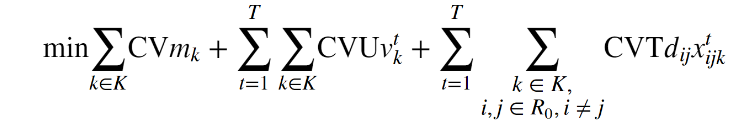
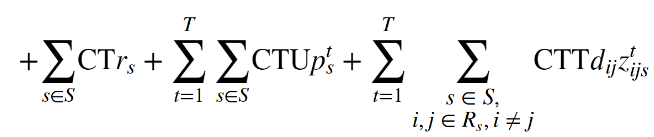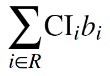

# **Constraints**

# **Constraint 1: Arc Balance Requirement for Vehicle Routes**

# **Constraint 2: Depot Start/End Requirement and Vehicle Capacity Bound**

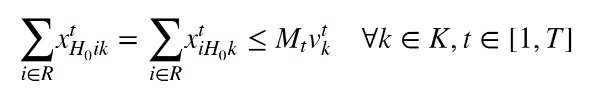

# **Constraint 3: Daily Total Travel Distance Limit for Vehicles**

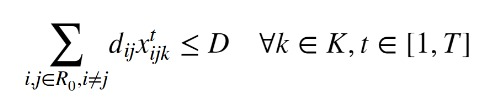

# **Constraint 4: Hire Before Utilization Requirement for Vehicles**

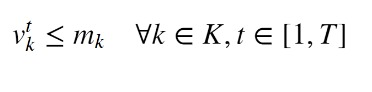

# **Constraint 5: Hiring Requirement for Traveling between Requests in a day**

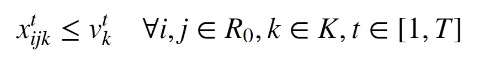

# **Constraint 6: Relationship between Routing and Service for Vehicle Deliveries in a horizon**

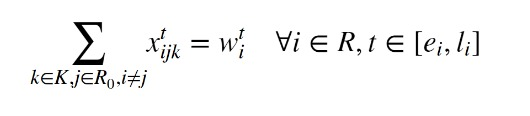

# **Constraint 7: Delivery Time Window and Assignment Requirement**

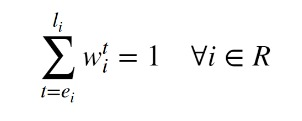

# **Constraint 8: MTZ constaint**

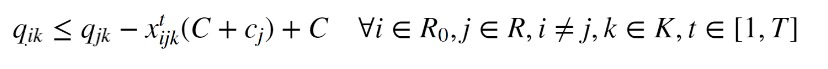

# **Constraint 9: Arc Balance Requirement for Technician Routes**

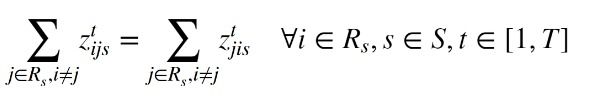

# **Constraint 10: Home Start/End Requirement for Technician**

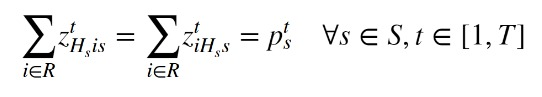

# **Constraint 11: Daily Total Travel Distance Limit for Technician**

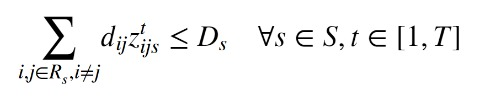

# **Constraint 12: Maximum Installations per Technician per Day**

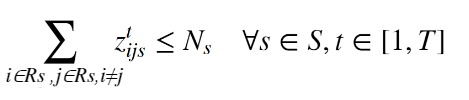

# **Constraint 13: Hire Before Utilization Requirement for Technician**

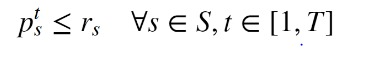

# **Constraint 14: Hiring Requirement for traveling between Requests in a day**


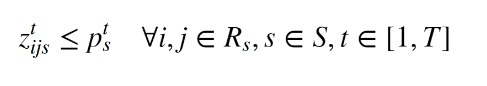

# **Constraint 15: Relationship between Routing and Service for technician installation in a horizon**


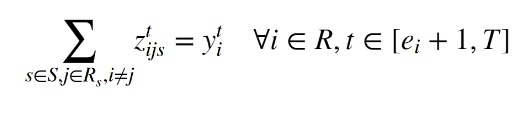

# **Constraint 16: Installation Time Window and Assignment Requirement**

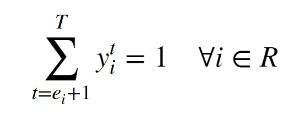

# **Constraint 17: MTZ constaint**

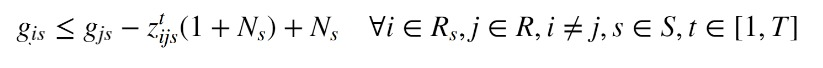

# **Constraint 18: Technician Working Day Restriction (5 consecutive days)**

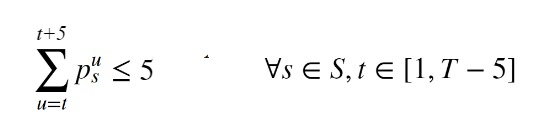

# **Constraint 19: Technician Working Day Restriction (4 or fewer consecutive days)**


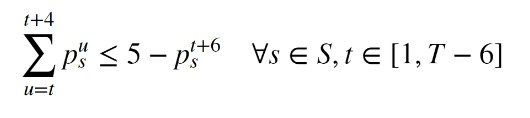

# **Constraint 20: Technician Working Day Restriction at the End of Planning Horizon**

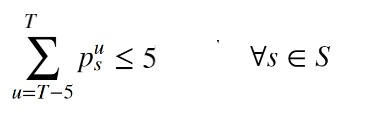

# **Constraint 21: Idling Time Calculation and Minimum Installation Delay**

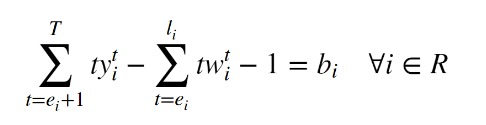

# **File Reading**

In [ ]:
def read_dataset(file_path):
    data = {}  # Initialize an empty dictionary to store the data

    with open(file_path, 'r') as file:
        lines = file.readlines()

        data['DATASET'] = lines[0].split('=')[1].strip()
        data['NAME'] = lines[1].split('=')[1].strip()
        data['DAYS'] = int(lines[3].split('=')[1].strip())
        data['TRUCK_CAPACITY'] = int(lines[4].split('=')[1].strip())
        data['TRUCK_MAX_DISTANCE'] = int(lines[5].split('=')[1].strip())

        data['TRUCK_DISTANCE_COST'] = int(lines[7].split('=')[1].strip())
        data['TRUCK_DAY_COST'] = int(lines[8].split('=')[1].strip())
        data['TRUCK_COST'] = int(lines[9].split('=')[1].strip())
        data['TECHNICIAN_DISTANCE_COST'] = int(lines[10].split('=')[1].strip())
        data['TECHNICIAN_DAY_COST'] = int(lines[11].split('=')[1].strip())
        data['TECHNICIAN_COST'] = int(lines[12].split('=')[1].strip())

        data['MACHINES'] = int(lines[14].split('=')[1].strip())
        data['MACHINES_INFO']=[]
        m_size = []
        m_latec=[]
        for i in range(data['MACHINES']):
            machine_id, size, latec = map(int, lines[14+i+1].split())
            m_size.append(size)
            m_latec.append(latec)
        data['MACHINES_INFO'].append(m_size)
        data['MACHINES_INFO'].append(m_latec)
        index=14+data['MACHINES']+1+1

        data['LOCATIONS'] = int(lines[index].split('=')[1].strip())
        locations_info = []
        for i in range(data['LOCATIONS']):
            location_id, x_coord, y_coord = map(int, lines[index+i+1].split())
            locations_info.append([ x_coord, y_coord])
        data['LOCATIONS_INFO'] = locations_info
        index=index+data['LOCATIONS']+1+1

        data['REQUESTS'] = int(lines[index].split('=')[1].strip())
        data['REQUESTS_INFO'] = []
        r_loc=[1]
        r_fd=[0]
        r_ld=[999]
        r_id=[1]
        r_md=[0]
        for i in range(data['REQUESTS']):
            da = list(lines[index+i+1].split())
            r_loc.append(int(da[1]))
            r_fd.append(int(da[2]))
            r_ld.append(int(da[3]))
            r_id.append(int(da[4]))
            r_md.append(int(da[5]))
        data['REQUESTS_INFO'].append(r_loc)
        data['REQUESTS_INFO'].append(r_fd)
        data['REQUESTS_INFO'].append(r_ld)
        data['REQUESTS_INFO'].append(r_id)
        data['REQUESTS_INFO'].append(r_md)
        index=index+data['REQUESTS']+1+1

        data['TECHNICIANS'] = int(lines[index].split('=')[1].strip())
        t_id=[]
        t_ho=[]
        t_md=[]
        t_mr=[]
        t_sk=[]
        data['TECHNICIANS_INFO']=[]

        for i in range(data['TECHNICIANS']):
            tech_line = lines[index + i + 1].split()
            t_id.append(int(tech_line[0]))
            t_ho.append(int(tech_line[1]))
            t_md.append(int(tech_line[2]))
            t_mr.append(int(tech_line[3]))
            temp=[]
            for i in range(data['MACHINES']):
                temp.append(int((tech_line[4+i])))
            t_sk.append(temp)

        data['TECHNICIANS_INFO'].append(t_ho)
        data['TECHNICIANS_INFO'].append(t_md)
        data['TECHNICIANS_INFO'].append(t_mr)
        data['TECHNICIANS_INFO'].append(t_sk)

    return data

DATASET_FILE = 'test1.txt'
data = read_dataset(DATASET_FILE)

print(data['NAME'])
print(data['DAYS'])
print(data['TRUCK_CAPACITY'])
print(data['TRUCK_MAX_DISTANCE'])
print(data['TRUCK_DISTANCE_COST'])
print(data['TRUCK_DAY_COST'])
print(data['TRUCK_COST'])
print(data['TECHNICIAN_DISTANCE_COST'])
print(data['TECHNICIAN_DAY_COST'])
print(data['TECHNICIAN_COST'])
print(data['MACHINES_INFO'])         #[size , Ideal Cost]
print(data['LOCATIONS_INFO'])
print(data['REQUESTS_INFO'])         #[Request id, location id, first day , Last day, machine id, total machine required]
print(data['TECHNICIANS_INFO'])      #[id,location id,max distance, max request, machine installation skill]

# **Importing Libraries**

In [ ]:
import cplex
from cplex.exceptions import CplexError
import numpy as np
import math
import time

# **Distance Calulation between location of request i and request j**

In [ ]:
d = [[0] * data['LOCATIONS'] for _ in range(data['LOCATIONS'])]

for i in range(data['LOCATIONS']):
    for j in range(data['LOCATIONS']):
        if i == j:
            d[i][j] = 0
        else:
            d[i][j] = math.ceil(((data['LOCATIONS_INFO'][i][0] - data['LOCATIONS_INFO'][j][0]) ** 2 +
                       (data['LOCATIONS_INFO'][i][1] - data['LOCATIONS_INFO'][j][1]) ** 2) ** 0.5)

# **Creating a set of iterations**

In [ ]:
#indexing set of the request
R=[i for i in range(1, data['REQUESTS']+1)]
R0=[0]+R
K=[i for i in range(1,data['REQUESTS']+1)]
S=[i for i in range(data['TECHNICIANS'])]
Rs=[[i for i in R if data['TECHNICIANS_INFO'][3][j][data['REQUESTS_INFO'][3][i]-1]==1] for j in S]
for i in range(data['TECHNICIANS']):
    data['REQUESTS_INFO'][0].append(data['TECHNICIANS_INFO'][0][i])
    Rs[i].append(i+data['REQUESTS']+1)

T=[i for i in range(1,data['DAYS']+1)]

# **Determining Factor**

In [ ]:
Mt=data['REQUESTS']

# **Creating a CPLEX Model**

In [ ]:
master = cplex.Cplex()
master.set_problem_type(cplex.Cplex.problem_type.LP)
master.objective.set_sense(master.objective.sense.minimize)

In [ ]:
variable_objectives=[]
variable_types=[]
variable_names=[]

# **Cost of Vehicle Rental Across Planning Duration**

In [ ]:
for k in K:
    variable_objectives.append(data['TRUCK_COST'])  # Objective coefficients
    variable_types.append('B')
    variable_names.append('m_{}'.format(k))

# **Daily Vehicle Rental Rate**

In [ ]:
for t in T:
    for k in K:
        variable_objectives.append(data['TRUCK_DAY_COST'])  # Objective coefficients
        variable_types.append('B')
        variable_names.append('v_{}_{}'.format(t,k))

# **Vehicle Operating Cost per distance**

In [ ]:
 for t in T:
    for k in K:
        for i in R0:
            for j in R0:
                if(i!=j):
                    i_ind=data['REQUESTS_INFO'][0][i]-1
                    j_ind=data['REQUESTS_INFO'][0][j]-1
                    variable_objectives.append(data['TRUCK_DISTANCE_COST']*d[i_ind][j_ind])  # Objective coefficients
                    variable_types.append('B')
                    variable_names.append('x_{}_{}_{}_{}'.format(t,i,j,k))

# **Cost of Technician Rental Across Planning Duration**

In [ ]:
for s in S:
    variable_objectives.append(data['TECHNICIAN_COST'])  # Objective coefficients
    variable_types.append('B')
    variable_names.append('r_{}'.format(s))

# **Daily Technician Rental Rate**

In [ ]:
 for t in T:
    for s in S:
        variable_objectives.append(data['TECHNICIAN_DAY_COST'])  # Objective coefficients
        variable_types.append('B')
        variable_names.append('p_{}_{}'.format(t,s))


# **Technician Operating Cost per distance**

In [ ]:
for t in T:
    for s in S:
        for i in Rs[s]:
            for j in Rs[s]:
                if(i!=j):
                    i_ind=data['REQUESTS_INFO'][0][i]-1
                    j_ind=data['REQUESTS_INFO'][0][j]-1
                    #print(i_ind,j_ind)
                    variable_objectives.append(data['TECHNICIAN_DISTANCE_COST']*d[i_ind][j_ind])  # Objective coefficients
                    variable_types.append('B')
                    variable_names.append('z_{}_{}_{}_{}'.format(t,i,j,s))

# **Installation delay penalties**

In [ ]:
for i in R:
    #print(i)
    variable_objectives.append(data['MACHINES_INFO'][1][data['REQUESTS_INFO'][3][i]-1])  # Objective coefficients
    variable_types.append('I')
    variable_names.append('b_{}'.format(i))

# **Adding the objective function to enviroment**

In [ ]:
master.variables.add(obj=variable_objectives, names=variable_names,types=variable_types)

range(0, 1581)

# **Constraint 1: Arc Balance Requirement for Vehicle Routes**
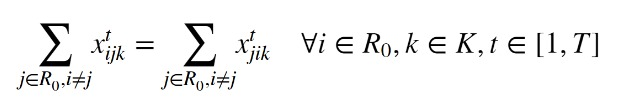


In [ ]:
con=1
for k in K:
    for i in R0:
        for t in T:
            constraint_variables=[]
            constraint_coefficients=[]
            constraint_names=[]
            for j in R0:
                if(i!=j):
                    constraint_variables.append('x_{}_{}_{}_{}'.format(t,i,j,k))
                    constraint_coefficients.append(1)
                    constraint_variables.append('x_{}_{}_{}_{}'.format(t,j,i,k))
                    constraint_coefficients.append(-1)
            constraint_names = ['c{}'.format(con)]
            con+=1

            master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[0],names=constraint_names)

#master.write("lpex1.lp")

# **Constraint 2: Depot Start/End Requirement and Vehicle Capacity Bound**
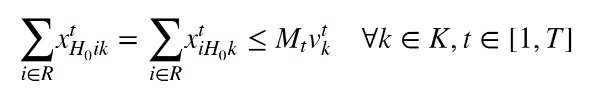

In [ ]:
for t in T:
    for k in K:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for j in R:
            constraint_variables.append('x_{}_{}_{}_{}'.format(t,0,j,k))
            constraint_coefficients.append(1)
        constraint_variables.append('v_{}_{}'.format(t,k))
        constraint_coefficients.append(-Mt)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[0],names=constraint_names)

# **Constraint 3: Daily Total Travel Distance Limit for Vehicles**
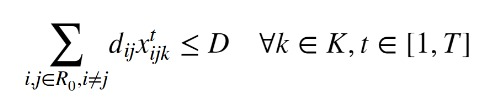

In [ ]:
for t in T:
    for k in K:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for i in R0:
            for j in R0:
                if(i!=j):
                    constraint_variables.append('x_{}_{}_{}_{}'.format(t,i,j,k))
                    i_ind=data['REQUESTS_INFO'][0][i]-1
                    j_ind=data['REQUESTS_INFO'][0][j]-1
                    constraint_coefficients.append(d[i_ind][j_ind])
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[data['TRUCK_MAX_DISTANCE']],names=constraint_names)

# **Constraint 4: Hire Before Utilization Requirement for Vehicles**
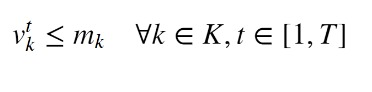

In [ ]:
for t in T:
    for k in K:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        constraint_variables.append('v_{}_{}'.format(t,k))
        constraint_coefficients.append(1)
        constraint_variables.append('m_{}'.format(k))
        constraint_coefficients.append(-1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[0],names=constraint_names)

# **Constraint 5: Hiring Requirement for Traveling between Requests in a day**
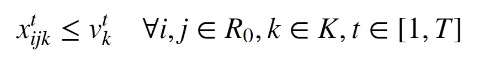

In [ ]:
for t in T:
    for k in K:
        for i in R0:
            for j in R0:
                if(i!=j):
                    constraint_variables=[]
                    constraint_coefficients=[]
                    constraint_names=[]
                    constraint_variables.append('x_{}_{}_{}_{}'.format(t,i,j,k))
                    constraint_coefficients.append(1)
                    constraint_variables.append('v_{}_{}'.format(t,k))
                    constraint_coefficients.append(-1)
                    constraint_names = ['c{}'.format(con)]
                    con+=1
                    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[0],names=constraint_names)

# **Constraint 6: Relationship between Routing and Service for Vehicle Deliveries in a horizon**
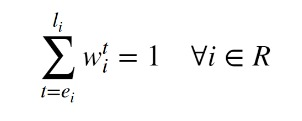

In [ ]:
for i in R:
    for t in range(data['REQUESTS_INFO'][1][i],data['REQUESTS_INFO'][2][i]+1):
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        variable_types=[]
        for k in K:
            for j in R0:
                if(i!=j):
                    constraint_variables.append('x_{}_{}_{}_{}'.format(t,i,j,k))
                    constraint_coefficients.append(1)
        constraint_variables.append('w_{}_{}'.format(t,i))
        variable_types.append('B')
        master.variables.add(names=['w_{}_{}'.format(t,i)],types=variable_types)
        constraint_coefficients.append(-1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[0],names=constraint_names)

# **Constraint 7: Delivery Time Window and Assignment Requirement**
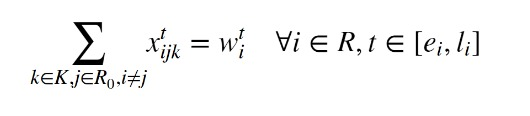

In [ ]:
for i in R:
    constraint_variables=[]
    constraint_coefficients=[]
    constraint_names=[]
    for t in range(data['REQUESTS_INFO'][1][i],data['REQUESTS_INFO'][2][i]+1):
        constraint_variables.append('w_{}_{}'.format(t,i))
        constraint_coefficients.append(1)
    constraint_names = ['c{}'.format(con)]
    con+=1
    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[1],names=constraint_names)

# **Constraint 8: MTZ constaint**
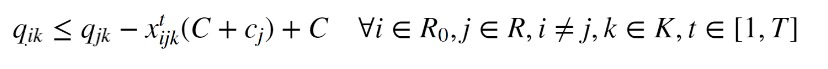

In [ ]:
for i in R0:
    for k in K:
        master.variables.add(names=['q_{}_{}'.format(i,k)],types=['I'],lb=[data['MACHINES_INFO'][0][data['REQUESTS_INFO'][3][i]-1]*data['REQUESTS_INFO'][4][i]],ub=[data['TRUCK_CAPACITY']])

In [ ]:
for i in R0:
    for j in R:
        if(i!=j):
            for k in K:
                for t in T:
                    constraint_variables=[]
                    constraint_coefficients=[]
                    constraint_names=[]
                    constraint_variables.append('x_{}_{}_{}_{}'.format(t,i,j,k))
                    Cj=data['MACHINES_INFO'][0][data['REQUESTS_INFO'][3][j]-1]*data['REQUESTS_INFO'][4][j] + data['TRUCK_CAPACITY']
                    constraint_coefficients.append(Cj)
                    constraint_variables.append('q_{}_{}'.format(i,k))
                    constraint_coefficients.append(1)
                    constraint_variables.append('q_{}_{}'.format(j,k))
                    constraint_coefficients.append(-1)
                    constraint_names = ['c{}'.format(con)]
                    con+=1
                    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[data['TRUCK_CAPACITY']],names=constraint_names)


# **Constraint 9: Arc Balance Requirement for Technician Routes**
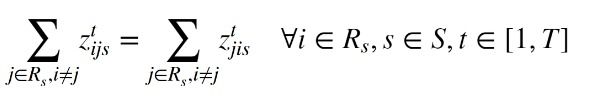

In [ ]:
for t in T:
    for s in S:
        for i in Rs[s]:
            constraint_variables=[]
            constraint_coefficients=[]
            constraint_names=[]
            for j in Rs[s]:
                if(i!=j):
                    constraint_variables.append('z_{}_{}_{}_{}'.format(t,i,j,s))
                    constraint_coefficients.append(1)
                    constraint_variables.append('z_{}_{}_{}_{}'.format(t,j,i,s))
                    constraint_coefficients.append(-1)
            constraint_names = ['c{}'.format(con)]
            con+=1
            master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[0],names=constraint_names)


# **Constraint 10: Home Start/End Requirement for Technician**
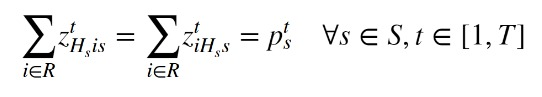

In [ ]:
for t in T:
    for s in S:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for i in Rs[s]:
            if(i!=data["REQUESTS"]+s+1):
                constraint_variables.append('z_{}_{}_{}_{}'.format(t,data["REQUESTS"]+s+1,i,s))
                constraint_coefficients.append(1)
        constraint_variables.append('p_{}_{}'.format(t,s))
        constraint_coefficients.append(-1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[0],names=constraint_names)

# **Constraint 11: Daily Total Travel Distance Limit for Technician**
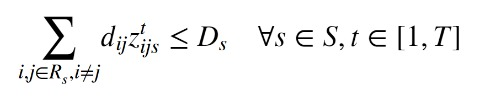

In [ ]:
for t in T:
    for s in S:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for i in Rs[s]:
            for j in Rs[s]:
                if(i!=j and j!=data["REQUESTS"]+s+1):
                    constraint_variables.append('z_{}_{}_{}_{}'.format(t,i,j,s))
                    constraint_coefficients.append(1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[data['TECHNICIANS_INFO'][2][s]],names=constraint_names)


# **Constraint 12: Maximum Installations per Technician per Day**
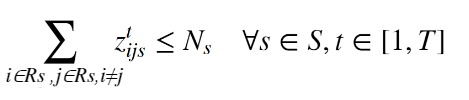

In [ ]:
for t in T:
    for s in S:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for i in Rs[s]:
            for j in Rs[s]:
                if(i!=j):
                    constraint_variables.append('z_{}_{}_{}_{}'.format(t,i,j,s))
                    i_ind=data['REQUESTS_INFO'][0][i]-1
                    j_ind=data['REQUESTS_INFO'][0][j]-1
                    constraint_coefficients.append(d[i_ind][j_ind])
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[data['TECHNICIANS_INFO'][1][s]],names=constraint_names)

# **Constraint 13: Hire Before Utilization Requirement for Technician**
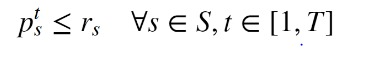

In [ ]:
for t in T:
    for s in S:
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        constraint_variables.append('p_{}_{}'.format(t,s))
        constraint_coefficients.append(1)
        constraint_variables.append('r_{}'.format(s))
        constraint_coefficients.append(-1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[0],names=constraint_names)

# **Constraint 14: Hiring Requirement for traveling between Requests in a day**
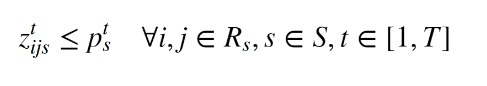

In [ ]:
for t in T:
    for s in S:
        for i in Rs[s]:
            for j in Rs[s]:
                if(i!=j):
                    constraint_variables=[]
                    constraint_coefficients=[]
                    constraint_names=[]
                    constraint_variables.append('z_{}_{}_{}_{}'.format(t,i,j,s))
                    constraint_coefficients.append(1)
                    constraint_variables.append('p_{}_{}'.format(t,s))
                    constraint_coefficients.append(-1)
                    constraint_names = ['c{}'.format(con)]
                    con+=1
                    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[0],names=constraint_names)

# **Constraint 15: Relationship between Routing and Service for technician installation in a horizon**
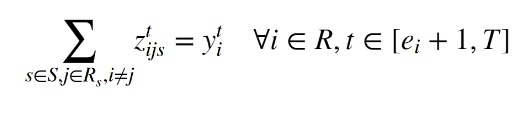

In [ ]:
for i in R:
    for t in range(data['REQUESTS_INFO'][1][i]+1,T[-1]+1):
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for s in S:
            for j in Rs[s]:
                if(i!=j and i in Rs[s]):
                    constraint_variables.append('z_{}_{}_{}_{}'.format(t,i,j,s))
                    constraint_coefficients.append(1)
        constraint_variables.append('y_{}_{}'.format(t,i))
        master.variables.add(names=['y_{}_{}'.format(t,i)],types=["B"])
        constraint_coefficients.append(-1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[0],names=constraint_names)

# **Constraint 16: Installation Time Window and Assignment Requirement**
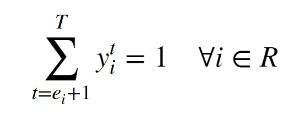

In [ ]:
for i in R:
    constraint_variables=[]
    constraint_coefficients=[]
    constraint_names=[]
    for t in range(data['REQUESTS_INFO'][1][i]+1,T[-1]+1):
        constraint_variables.append('y_{}_{}'.format(t,i))
        constraint_coefficients.append(1)
    constraint_names = ['c{}'.format(con)]
    con+=1
    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[1],names=constraint_names)

# **Constraint 17: MTZ constaint**
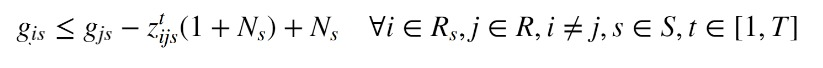

In [ ]:
for s in S:
    for i in Rs[s]:
        master.variables.add(names=['g_{}_{}'.format(i,s)],types=['I'],lb=[1],ub=[data['TECHNICIANS_INFO'][2][s]])

In [ ]:
for t in T:
    for s in S:
        for i in Rs[s]:
            for j in Rs[s]:
                    if(i!=j):
                        if(j!=Rs[s][-1]):
                            constraint_variables=[]
                            constraint_coefficients=[]
                            constraint_names=[]
                            constraint_variables.append('z_{}_{}_{}_{}'.format(t,i,j,s))
                            Cj=data['TECHNICIANS_INFO'][2][s] + 1
                            constraint_coefficients.append(Cj)
                            constraint_variables.append('g_{}_{}'.format(i,s))
                            constraint_coefficients.append(1)
                            constraint_variables.append('g_{}_{}'.format(j,s))
                            constraint_coefficients.append(-1)
                            constraint_names = ['c{}'.format(con)]
                            con+=1
                            master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[data['TECHNICIANS_INFO'][2][s]],names=constraint_names)


# **Constraint 18: Technician Working Day Restriction (5 consecutive days)**
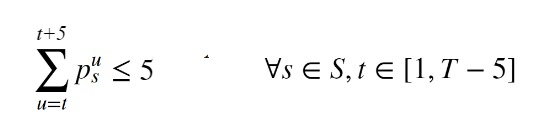

In [ ]:
for s in S:
    for t in range(1,T[-1]-5):
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for u in range(5):
            constraint_variables.append('p_{}_{}'.format(t+u,s))
            constraint_coefficients.append(1)
        constraint_variables.append('p_{}_{}'.format(t+6,s))
        constraint_coefficients.append(1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[5],names=constraint_names)

# **Constraint 19: Technician Working Day Restriction (4 or fewer consecutive days)**
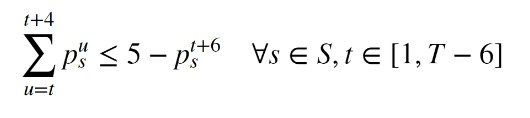

In [ ]:
for s in S:
    for t in range(1,T[-1]-4):
        constraint_variables=[]
        constraint_coefficients=[]
        constraint_names=[]
        for u in range(6):
            constraint_variables.append('p_{}_{}'.format(u,s))
            constraint_coefficients.append(1)
        constraint_names = ['c{}'.format(con)]
        con+=1
        master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[5],names=constraint_names)

# **Constraint 20: Technician Working Day Restriction at the End of Planning Horizon**
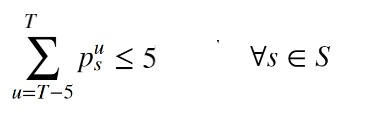

In [ ]:
for s in S:
    constraint_variables=[]
    constraint_coefficients=[]
    constraint_names=[]
    for u in range(max(T[-1]-5,1),T[-1]+1):
        constraint_variables.append('p_{}_{}'.format(u,s))
        constraint_coefficients.append(1)
    constraint_names = ['c{}'.format(con)]
    con+=1
    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['L'],rhs=[5],names=constraint_names)

# **Constraint 21: Idling Time Calculation and Minimum Installation Delay**
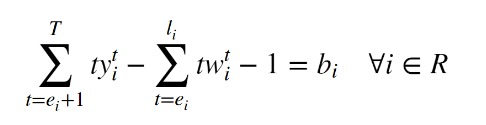

In [ ]:
for i in R:
    constraint_variables=[]
    constraint_coefficients=[]
    constraint_names=[]
    for t in range(data['REQUESTS_INFO'][1][i]+1,T[-1]+1):
        constraint_variables.append('y_{}_{}'.format(t,i))
        constraint_coefficients.append(t)
    for t in range(data['REQUESTS_INFO'][1][i],data['REQUESTS_INFO'][2][i]+1):
        constraint_variables.append('w_{}_{}'.format(t,i))
        constraint_coefficients.append(-t)
    constraint_variables.append('b_{}'.format(i))
    #master.variables.add(names=['b_{}'.format(i)],types=['I'])
    constraint_coefficients.append(-1)
    constraint_names = ['c{}'.format(con)]
    con+=1
    master.linear_constraints.add(lin_expr=[[constraint_variables, constraint_coefficients]],senses=['E'],rhs=[1],names=constraint_names)

# **Solving using CPLEX**

In [ ]:
master.solve()

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 1877 rows and 671 columns.
MIP Presolve modified 1645 coefficients.
Aggregator did 80 substitutions.
Reduced MIP has 1380 rows, 932 columns, and 5975 nonzeros.
Reduced MIP has 883 binaries, 49 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.06 sec. (11.99 ticks)
Found incumbent of value 4.9390670e+07 after 0.08 sec. (17.76 ticks)
Probing fixed 206 vars, tightened 0 bounds.
Probing time = 0.03 sec. (6.33 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 368 rows and 246 columns.
MIP Presolve modified 26 coefficients.
Aggregator did 2 substitutions.
Reduced MIP has 1010 rows, 684 columns, and 4083 nonzeros.
Reduced MIP has 645 binaries, 39 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (5.43 ticks)
Probing time = 0.01 sec. (2.58 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1010 row

# **Solution**

**TECHNISIAN USED 1 AND 5**

**VEHICLE USED 2 AND 3**

---



- **DAY 1**

- **DAY 2**

        D-1-D-->V2
        D-3-D-->V2
        D-5-2-D-->V3

- **DAY 3**
        D-4-D-->V2
        D-6-D-->V3
        H5-5-3-1-2-H5-->T5


- **DAY 4**
        H0-4-6-H0-->T1




# **Reference**


- Kheiri, A., Ahmed, L., Boyacı, B., Gromicho, J., Mumford, C., Özcan, E. and Dirikoç, A.S., 2020. Exact and hyper‐heuristic solutions for the distribution‐installation problem from the VeRoLog 2019 challenge. Networks, 76(2), pp.294-319.

- https://co-enzyme.fr/blog/traveling-salesman-problem-tsp-in-cplex-opl-with-miller-tucker-zemlin-mtz-formulation/